In [101]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import re
import wordcloud
import plotly.graph_objects as go
import plotly.express as px

In [102]:
data = pd.read_csv('../data/combined_data_v3.csv')

In [103]:
print(data.shape)
print(data.drop_duplicates().shape)

data = data.drop_duplicates().reset_index(drop = True)

(389504, 5)
(374292, 5)


In [104]:
389504 - 385170

4334

In [105]:
data.sample(n = 20)

,source,headline,year,date,is_sarcastic
91333,ABC Australia,facefit of man in andrew carville murder case ...,2016,2016-02-04,0
183138,ABC Australia,west papua independence activists present 1.8,2017,2017-09-28,0
272800,npr,Palestinians Expected To Continue Protesting D...,2018,2018-04-05,0
207074,ABC Australia,air national guard members reprimanded for pup...,2018,2018-04-20,0
177626,ABC Australia,orkambi medication subsidy setback for cystic ...,2017,2017-08-19,0
214128,ABC Australia,man accused of sexually assaulting 11 year old...,2018,2018-06-20,0
254680,ABC Australia,saab the silver lining as dragons gloomy seaso...,2019,2019-07-31,0
130346,ABC Australia,suspected asbestos find halts work on glenorch...,2016,2016-09-12,0
249542,ABC Australia,fire threatens homes evacuations begin near bu...,2019,2019-06-06,0
187032,ABC Australia,british navy sacks nuclear submariners over co...,2017,2017-10-28,0


In [106]:
data.describe()

,year,is_sarcastic
count,374292.000000,374292.000000
mean,2017.450613,0.060846
std,1.249398,0.239047
min,2016.000000,0.000000
25%,2016.000000,0.000000
50%,2017.000000,0.000000
75%,2018.000000,0.000000
max,2020.000000,1.000000


In [37]:
sarcastic_year_group = data.groupby(['year','is_sarcastic']).count()
sarcastic_year_group = sarcastic_year_group.reset_index()
sarcastic_year_group = sarcastic_year_group[[ 'year', 'is_sarcastic', 'headline']]
sarcastic_year_group.columns = ['year', 'is_sarcastic', 'count']

In [38]:
fig = px.bar(sarcastic_year_group, x="year", y="count", color="is_sarcastic", title="Satirical vs Non-Satirical")
fig.show()

In [39]:
source_year_group = data.groupby(['source','year','is_sarcastic']).count()
source_year_group = source_year_group.reset_index()
source_year_group = source_year_group[['source', 'year', 'is_sarcastic', 'headline']]
source_year_group.columns = ['source', 'year', 'is_sarcastic', 'count']

In [40]:
fig = px.bar(source_year_group, x="year", y="count", color="source", title="Sources")
fig.show()

In [41]:
fig = px.bar(source_year_group, x="source", y="count", color="year", title="Year by Source")
fig.show()

### Length of Titles

In [42]:
data['len'] = data['headline'].apply(lambda x: len(x))

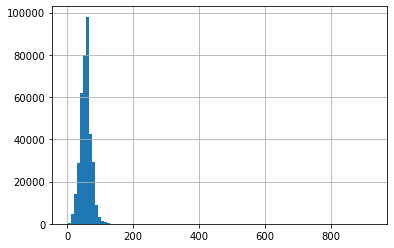

In [46]:
data['len'].hist(bins = 100)

In [47]:
data['token_len'] = data['headline'].apply(lambda x: len(x.split()))

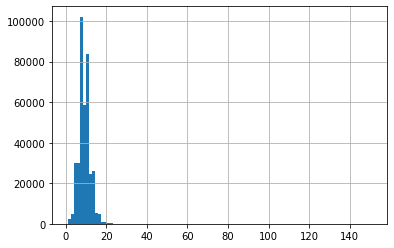

In [48]:
data['token_len'].hist(bins = 100)

In [49]:
### Some very long titles, will put in a max-len.

In [50]:
label_len_group = data.groupby(['token_len', 'is_sarcastic']).size().reset_index()
label_len_group

,token_len,is_sarcastic,0
0,1,0,312
1,1,1,8
2,2,0,1825
3,2,1,104
4,3,0,4788
...,...,...,...
70,44,1,1
71,56,1,1
72,57,1,1
73,71,1,1


In [108]:
label_len_group.iloc[35:45]

,token_len,is_sarcastic,0
35,18,1,534
36,19,0,181
37,19,1,383
38,20,0,85
39,20,1,247
40,21,0,58
41,21,1,161
42,22,0,17
43,22,1,101
44,23,0,9


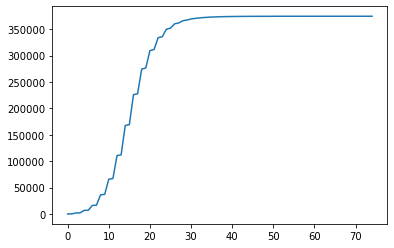

In [51]:
plt.plot(np.cumsum(label_len_group[0].values))

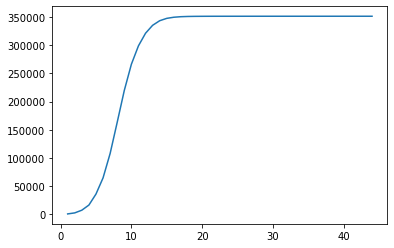

In [111]:
plt.plot(label_len_group.loc[label_len_group['is_sarcastic']==0]['token_len'].values, np.cumsum(label_len_group.loc[label_len_group['is_sarcastic']==0][0].values))

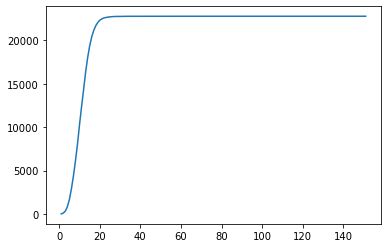

In [112]:
plt.plot(label_len_group.loc[label_len_group['is_sarcastic']==1]['token_len'].values,np.cumsum(label_len_group.loc[label_len_group['is_sarcastic']==1][0].values))

In [55]:
label_len_group.loc[label_len_group['is_sarcastic']==0]

,token_len,is_sarcastic,0
0,1,0,312
2,2,0,1825
4,3,0,4788
6,4,0,9124
8,5,0,19552
10,6,0,28760
12,7,0,43354
14,8,0,55481
16,9,0,56475
18,10,0,46498


In [114]:
max_len = 30

### Source Specific Language

In [57]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [72]:
clean = pd.read_csv('../data/combined_clean.csv', sep = "|")
clean['token_len'] = clean['clean'].apply(lambda x: len(str(x).split()))
clean = clean.loc[clean['token_len'] > 0]
clean = clean.loc[clean['token_len'] <= 41]
clean.reset_index(inplace = True, drop = True)

In [73]:
clean.sort_values(by = 'token_len')

,source,year,clean,is_sarcastic,token_len
362405,atlantic,2016,quoted,0,1
57201,Huffington Post,2017,trumpdontcare,0,1
365745,atlantic,2016,quoted,0,1
363627,atlantic,2016,quoted,0,1
213855,ABC Australia,2018,faymoseley,0,1
...,...,...,...,...,...
370697,onion,2018,one for the road seaworld has realized people ...,1,35
374422,onion,2019,thomas jefferson the tree of liberty must be r...,1,37
375851,onion,2020,hawks celtics nets hornets bulls cavs mavs nug...,1,37
12164,Huffington Post,2019,occasionally you realize someone you thought w...,0,38


In [67]:
clean.sample(n = 5)

,source,year,clean,is_sarcastic,token_len
182951,ABC Australia,2017,novak djokovic out of french open in straight ...,0,11
176635,ABC Australia,2017,can you have too many antioxidants,0,6
42704,Huffington Post,2017,trump court pick rated not qualified sits thro...,0,11
186802,ABC Australia,2017,wall street and most major global markets clos...,0,9
122404,ABC Australia,2016,bank earnings down bad debts up but shares rally,0,9


In [88]:
cv = feature_extraction.text.CountVectorizer(lowercase = True,
                                             strip_accents = 'ascii',
                                             ngram_range=(1,3),
                                             stop_words="english",
                                             max_df = .8,
                                             min_df = 10, binary = True)

In [89]:
train = clean.loc[clean['year'] != 2020]
test = clean.loc[clean['year'] == 2020]

X_train = train['clean'].values.astype('U')

In [90]:
print("Fitting Count Vectorizer")
cv.fit(X_train)
X_train_cv = cv.transform(X_train)

Fitting Count Vectorizer


In [91]:
train['source'].unique()

array(['Huffington Post', 'ABC Australia', 'npr', 'guardian',
       'nottheonion', 'atlantic', 'onion', 'reductress',
       'national report', 'Hard Times'], dtype=object)

In [92]:
source_specific = []
for source in train['source'].unique():
    Y_train = train['source'].apply(lambda x: 1 if x == source else 0)
    lr_cv = LogisticRegression(max_iter = 100)
    lr_cv.fit(X_train_cv, Y_train)
    
    vocab = cv.get_feature_names()
    coef_dicts = []
    for i, coef_ in enumerate(list(lr_cv.coef_[0,:])):
        coef_dict = {'word': vocab[i], 'coef': coef_}
        coef_dicts.append(coef_dict)
    coef_pd = pd.DataFrame(coef_dicts)
    source_dict = {'source': source, 'phrases': coef_pd.sort_values('coef', ascending=False)['word'][:50].values}
    source_specific.append(source_dict)

C:\Users\yagne\.conda\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\yagne\.conda\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\yagne\.conda\en

In [94]:
source_specific

[{'source': 'Huffington Post',
  'phrases': array(['huffpollster', 'huffpost', 'gps guide', 'looney', 'morning email',
         'hilariously', 'nsfw', 'maher', 'tweeters', 'antilgbtq', 'spoof',
         'fk', 'hilarious', 'excop', 'bachelor', 'chipotle', 'mesmerizing',
         'soninlaw', 'lgbtq', 'gulf crisis', 'talktome', 'daily meditation',
         'gas station', 'nighter', 'mizzou', 'nyc', 'asianamerican',
         'sunday roundup', 'away murder', 'indigenous peoples', 'tax scam',
         'australian police', '2014', 'van jones', 'adorably', 'feds',
         'rep', 'news roundup', 'americans say', 'colbert', 'suicide squad',
         'recipes', 'queer', 'walking dead', 'gop', 'conan', 'ucla',
         'folks', 'icymi', 'adorable'], dtype=object)},
 {'source': 'ABC Australia',
  'phrases': array(['planet america', 'talking pictures', 'tasmania', 'perth', 'png',
         'adelaide', 'wa', 'anti', 'afl', 'queensland', 'nt', 'canberra',
         'nsw', 'aboriginal', 'sa', 'hobart', 

Huffington Post


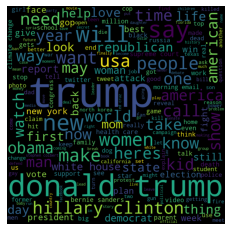

ABC Australia


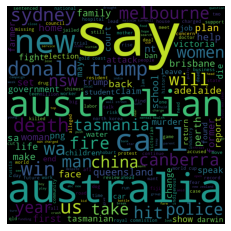

npr


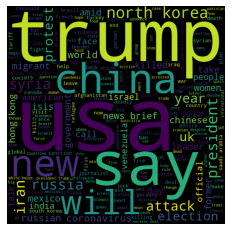

guardian


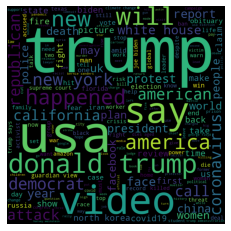

nottheonion


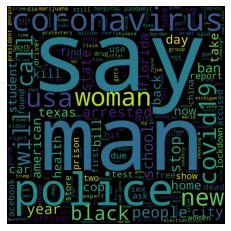

atlantic


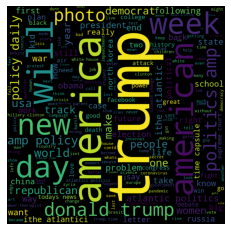

onion


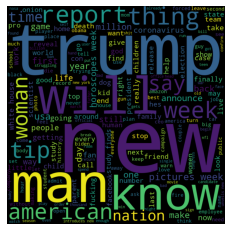

reductress


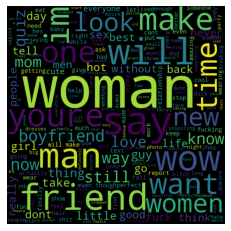

national report


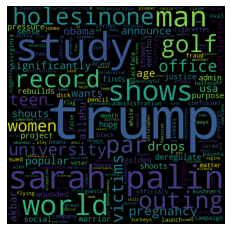

Hard Times


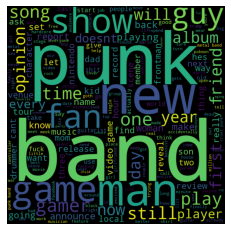

In [100]:
for source in clean['source'].unique():
    source_text = clean.loc[clean['source'] == source]['clean'].astype('U')

    wc = wordcloud.WordCloud(width = 800, height = 800).generate(" ".join(source_text))
    plt.imshow(wc)
    plt.axis("off")
    print(source)
    plt.show()